In [11]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from cieluv import *
from RootPolyRegression import *
from CIELab import *
%matplotlib inline

1.77211


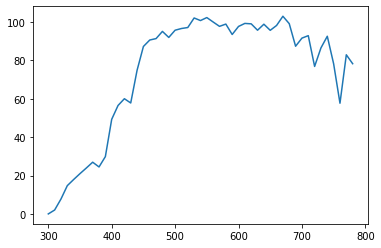

In [24]:
x = np.linspace(380, 780, 101)
spectra = np.loadtxt("ColorCheckerSG_spectra.txt")

x = np.linspace(380, 710, 34)
# D65 source
src65 = np.loadtxt("./d65.illum")
x_src = np.linspace(300, 830, 531)
src65 = np.interp(x, x_src, src65)
D65 = np.diag(src65)

#D50 source
src50 = np.loadtxt("./d50.illum")
x_src = np.linspace(300, 780, 97)
plt.plot(x_src, src50)
src50 = np.interp(x, x_src, src50)
D50 = np.diag(src50)


# XYZ spectral sensitivities
# f = open('camera.kinect1.json', 'r')
# xyz_dict = json.load(f)
# XYZ_R = np.array(xyz_dict['sensitivities']['red'])[:, 1]
# XYZ_G = np.array(xyz_dict['sensitivities']['green'])[:, 1]
# XYZ_B = np.array(xyz_dict['sensitivities']['blue'])[:, 1]
# x_XYZ = np.linspace(365, 830, 94) 
# sens_XYZ_R = np.interp(x, x_XYZ, XYZ_R)
# sens_XYZ_G = np.interp(x, x_XYZ, XYZ_G)
# sens_XYZ_B = np.interp(x, x_XYZ, XYZ_B)

ciexyz = pd.read_csv("/home/kvsoshin/Загрузки/ciexyz31_1.csv", header=None)
ciexyz = ciexyz.values
XYZ_R = ciexyz[:, 1]
XYZ_G = ciexyz[:, 2]
XYZ_B = ciexyz[:, 3]
x_XYZ = np.linspace(360, 830, 471)
sens_XYZ_R = np.interp(x, x_XYZ, XYZ_R)
sens_XYZ_G = np.interp(x, x_XYZ, XYZ_G)
sens_XYZ_B = np.interp(x, x_XYZ, XYZ_B)



# RGB camera sensitivities
cam_R, cam_G, cam_B = np.loadtxt("cam_R.spect"), np.loadtxt("cam_G.spect"), np.loadtxt("cam_B.spect")
x_RGB = np.linspace(380, 784, 101)
sens_RGB_R = np.interp(x, x_RGB, cam_R)
sens_RGB_G = np.interp(x, x_RGB, cam_G)
sens_RGB_B = np.interp(x, x_RGB, cam_B)

print(max(sens_XYZ_B))

In [22]:
ciexyz = pd.read_csv("/home/kvsoshin/Загрузки/ciexyz31_1.csv", header=None)
ciexyz = ciexyz.values
ciexyz.shape
ciexyz

array([[3.600000e+02, 1.299000e-04, 3.917000e-06, 6.061000e-04],
       [3.610000e+02, 1.458470e-04, 4.393581e-06, 6.808792e-04],
       [3.620000e+02, 1.638021e-04, 4.929604e-06, 7.651456e-04],
       ...,
       [8.280000e+02, 1.439440e-06, 5.198080e-07, 0.000000e+00],
       [8.290000e+02, 1.341977e-06, 4.846120e-07, 0.000000e+00],
       [8.300000e+02, 1.251141e-06, 4.518100e-07, 0.000000e+00]])

In [23]:
np.linspace(360, 830, 471)

array([360., 361., 362., 363., 364., 365., 366., 367., 368., 369., 370.,
       371., 372., 373., 374., 375., 376., 377., 378., 379., 380., 381.,
       382., 383., 384., 385., 386., 387., 388., 389., 390., 391., 392.,
       393., 394., 395., 396., 397., 398., 399., 400., 401., 402., 403.,
       404., 405., 406., 407., 408., 409., 410., 411., 412., 413., 414.,
       415., 416., 417., 418., 419., 420., 421., 422., 423., 424., 425.,
       426., 427., 428., 429., 430., 431., 432., 433., 434., 435., 436.,
       437., 438., 439., 440., 441., 442., 443., 444., 445., 446., 447.,
       448., 449., 450., 451., 452., 453., 454., 455., 456., 457., 458.,
       459., 460., 461., 462., 463., 464., 465., 466., 467., 468., 469.,
       470., 471., 472., 473., 474., 475., 476., 477., 478., 479., 480.,
       481., 482., 483., 484., 485., 486., 487., 488., 489., 490., 491.,
       492., 493., 494., 495., 496., 497., 498., 499., 500., 501., 502.,
       503., 504., 505., 506., 507., 508., 509., 51

In [63]:
X_WHITE = np.dot(sens_XYZ_R.T, src50)
Y_WHITE = np.dot(sens_XYZ_G.T, src50)
Z_WHITE = np.dot(sens_XYZ_B.T, src50)
print("White point: ", X_WHITE, Y_WHITE, Z_WHITE)
WHITE_POINT_XYZ_D50 = [X_WHITE, Y_WHITE, Z_WHITE]
WHITE_POINT_XYZ_D50 /= Y_WHITE
WHITE_POINT_XYZ_D50

White point:  1012.189529033334 1050.3984770287002 866.1910163015318


array([0.96362433, 1.        , 0.82463088])

In [97]:
colorsXYZ = []
#D65 = np.eye(34)
for i in range(spectra.shape[0]):
    refl = spectra[i]
    X = np.dot(np.dot(sens_XYZ_R.T, D50), refl)
    Y = np.dot(np.dot(sens_XYZ_G.T, D50), refl)
    Z = np.dot(np.dot(sens_XYZ_B.T, D50), refl)
    c = np.array([X, Y, Z]) / Y_WHITE
    colorsXYZ.append(c)
colorsXYZ = np.array(colorsXYZ)
colorsXYZ = colorsXYZ

In [98]:
colorsXYZ

array([[0.87567783, 0.91158387, 0.75598995],
       [0.00678098, 0.00708075, 0.00602063],
       [0.17258403, 0.18130566, 0.14924692],
       [0.87465284, 0.9104264 , 0.75474997],
       [0.00685214, 0.00715581, 0.00608835],
       [0.17221238, 0.18094417, 0.1490376 ],
       [0.87488993, 0.91077516, 0.75523524],
       [0.00686385, 0.0071594 , 0.00600699],
       [0.17264809, 0.18140817, 0.14932847],
       [0.87291432, 0.90868852, 0.75262525],
       [0.1727394 , 0.18147648, 0.1494518 ],
       [0.2015915 , 0.11297251, 0.0629021 ],
       [0.39249863, 0.31777228, 0.31895437],
       [0.14580285, 0.07840407, 0.11004265],
       [0.13544105, 0.12928275, 0.42746645],
       [0.18608898, 0.22494843, 0.43591617],
       [0.01596512, 0.01976058, 0.04509254],
       [0.1612673 , 0.21878226, 0.36722462],
       [0.03357509, 0.03529941, 0.01869915],
       [0.17241387, 0.18115453, 0.14923409],
       [0.00684868, 0.00714964, 0.00617446],
       [0.05213991, 0.03828565, 0.05011517],
       [0.

In [74]:
wp_toD65 = np.array([96.42, 100.0, 82.49]) / np.array([95.047, 100.0, 108.883]) 
wp_toD65

array([1.01444548, 1.        , 0.7576022 ])

In [75]:
colorsXYZ_to_D50 = colorsXYZ * wp_toD65
colorsXYZ_to_D50

array([[0.88832742, 0.91158387, 0.57273965],
       [0.00687893, 0.00708075, 0.00456124],
       [0.17507709, 0.18130566, 0.11306979],
       [0.88728762, 0.9104264 , 0.57180024],
       [0.00695112, 0.00715581, 0.00461255],
       [0.17470007, 0.18094417, 0.11291121],
       [0.88752814, 0.91077516, 0.57216788],
       [0.006963  , 0.0071594 , 0.00455091],
       [0.17514207, 0.18140817, 0.11313158],
       [0.88552399, 0.90868852, 0.57019055],
       [0.17523471, 0.18147648, 0.11322501],
       [0.20450359, 0.11297251, 0.04765477],
       [0.39816846, 0.31777228, 0.24164053],
       [0.14790904, 0.07840407, 0.08336856],
       [0.13739757, 0.12928275, 0.32384953],
       [0.18877712, 0.22494843, 0.33025104],
       [0.01619574, 0.01976058, 0.03416221],
       [0.16359688, 0.21878226, 0.27821018],
       [0.0340601 , 0.03529941, 0.01416652],
       [0.17490448, 0.18115453, 0.11306007],
       [0.00694761, 0.00714964, 0.00467779],
       [0.0528931 , 0.03828565, 0.03796736],
       [0.

In [86]:
def get_palette(colors, palettesize, patchsize=10):
    h = palettesize[0]
    l = palettesize[1]
    if h * l != colors.shape[0]:
        raise ValueError('Length of \'colors\' must be equal to product of elements of \'size\' ')
    
    palette = np.zeros((h * patchsize, l * patchsize, 3))
    for i in range(colors.shape[0]):
        palette[(i // l * patchsize):((i // l + 1) * patchsize), (i % l * patchsize):((i % l +1)*patchsize)] = colors[i]
    
    return palette

# def XYZ_to_RGB(XYZ):
#     XYZ_to_RGB = np.array([[0.41847, -0.15866, -0.082835],
#                             [-0.091169, 0.25243, 0.015708],
#                             [0.000920, -0.002549, 0.17860]])
#     return np.dot(XYZ_to_RGB, XYZ)

def XYZ_to_RGB(XYZ):
    XYZ_to_RGB = np.array([[3.2406, -1.5372, -0.4986],
                            [-0.9689, 1.8758, 0.0416],
                            [0.0557, -0.204, 1.0570]])
    return np.dot(XYZ_to_RGB, XYZ)

def lol(XYZ):
    M = np.array([[3.1338561, -1.6168667, -0.4906146],
                 [-0.9787684,  1.9161415,  0.0334540],
                 [0.0719453, -0.2289914,  1.4052427]])
    return np.dot(M, XYZ)

def C_sRGB(C_lin):
    if C_lin <= 0.0031308:
        return 12.92 * C_lin
    else: return 1.055 * C_lin ** (1 / 2.4) - 0.055

def RGB_to_sRGB(RGB):
    return np.array([C_sRGB(RGB[0]), C_sRGB(RGB[1]), C_sRGB(RGB[2])])

def XYZ_to_LMS(XYZ):
    XYZ_to_LMS = np.array([[0.38971, 0.68898, -0.07868],
                          [-0.22981, 1.18340, 0.04641],
                          [0.0, 0.0, 1.0]])
    return np.dot(XYZ_to_LMS, XYZ)

[[[243.37834564 245.21619311 245.41402915]
  [115.98340917 118.75556647 117.91586246]
  [ 19.75163642  20.41714168  21.06434918]
  [243.40790722 245.24792946 245.41601385]
  [116.01859391 118.79953476 117.94560285]
  [ 19.84833905  20.47925903  21.09542987]
  [243.35371321 245.24935579 245.41193875]
  [115.99320137 118.81326221 117.97738028]
  [ 20.11549976  20.77069649  21.3799579 ]
  [243.49971289 245.29457197 245.41628316]
  [116.13927019 118.92998349 118.06686661]
  [ 20.48217584  21.01688941  21.40630866]
  [116.10232057 118.878429   118.01193251]
  [243.32915988 245.02032926 245.04919948]]

 [[ 19.69975951  20.27550625  20.66269964]
  [173.0655316   40.04796626  78.42199929]
  [ 78.36316752  42.84898297  72.33364156]
  [206.36102297 206.72948476 226.52861056]
  [113.05293175  73.27213726  40.27941552]
  [213.44607949 144.83767596 132.5644214 ]
  [ 84.01057968 104.61600552 146.93975744]
  [ 60.0461771   96.97629573  45.79193776]
  [133.82206486 113.14512465 161.02084016]
  [ 63.92

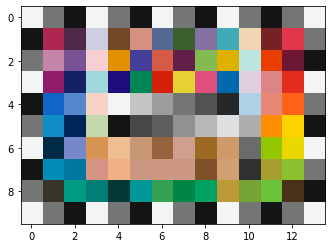

In [105]:
p = get_palette(colorsXYZ, (14, 10), patchsize=1)
p = np.transpose(p, axes=(1,0,2))
for i in range(p.shape[0]):
    for j in range(p.shape[1]):
        p[i, j] = (RGB_to_sRGB(lol(p[i, j])))
#print(np.amax(p), np.amin(p))
#p /= p[0, 0]
plt.imshow(np.clip(p, 0, 1))
print(np.clip(p, 0, 1) * 255)

In [5]:
ground_truth = np.loadtxt("CC SG Lab D50.txt")
ground_truth

array([[ 9.655e+01, -9.100e-01,  5.700e-01],
       [ 6.430e+00, -6.000e-02, -4.100e-01],
       [ 4.970e+01, -1.800e-01,  3.000e-02],
       [ 9.650e+01, -8.900e-01,  5.900e-01],
       [ 6.500e+00, -6.000e-02, -4.400e-01],
       [ 4.966e+01, -2.000e-01,  1.000e-02],
       [ 9.652e+01, -9.100e-01,  5.800e-01],
       [ 6.490e+00, -2.000e-02, -2.800e-01],
       [ 4.972e+01, -2.000e-01,  4.000e-02],
       [ 9.643e+01, -9.100e-01,  6.700e-01],
       [ 4.972e+01, -1.900e-01,  2.000e-02],
       [ 3.260e+01,  5.158e+01, -1.085e+01],
       [ 6.075e+01,  2.622e+01, -1.869e+01],
       [ 2.869e+01,  4.828e+01, -3.900e+01],
       [ 4.938e+01, -1.543e+01, -4.848e+01],
       [ 6.063e+01, -3.077e+01, -2.623e+01],
       [ 1.929e+01, -2.637e+01, -6.150e+00],
       [ 6.015e+01, -4.177e+01, -1.260e+01],
       [ 2.142e+01,  1.670e+00,  8.790e+00],
       [ 4.969e+01, -2.000e-01,  1.000e-02],
       [ 6.500e+00, -3.000e-02, -6.700e-01],
       [ 2.182e+01,  1.733e+01, -1.835e+01],
       [ 4

In [6]:
for i in range(colorsXYZ.shape[0]):
    #print("!", c)
    print(XYZ_to_CIELAB(colorsXYZ[i], WHITE_POINT_XYZ_D50), "{:.2f}".format(ground_truth[i][0]), "{:.2f}".format(ground_truth[i][1]), "{:.2f}".format(ground_truth[i][2]))

[ 97.22087294  -3.71969626 -19.13343338] 96.55 -0.91 0.57
[ 6.53554854 -0.65214341 -3.99695923] 6.43 -0.06 -0.41
[ 50.07310534  -2.60145742 -10.96788748] 49.70 -0.18 0.03
[ 97.17138147  -3.70456238 -19.10011133] 96.50 -0.89 0.59
[ 6.60516312 -0.66085997 -4.04300434] 6.50 -0.06 -0.44
[ 50.03035298  -2.61146349 -10.98440094] 49.66 -0.20 0.01
[ 97.18707255  -3.721077   -19.11906974] 96.52 -0.91 0.58
[ 6.59997352 -0.63252399 -3.8531773 ] 6.49 -0.02 -0.28
[ 50.08580188  -2.61787111 -10.96817652] 49.72 -0.20 0.04
[ 97.09742012  -3.71952747 -19.01927641] 96.43 -0.91 0.67
[ 50.09462602  -2.60519888 -10.98920717] 49.72 -0.19 0.02
[38.40773575 49.22745216 -2.49668936] 32.60 51.58 -10.85
[ 63.25474588  25.35014872 -25.93572095] 60.75 26.22 -18.69
[ 33.06954506  48.13077052 -32.37000077] 28.69 48.28 -39.00
[ 47.17866435   3.4901866  -69.62477413] 49.38 -15.43 -48.48
[ 58.11281    -18.25875433 -50.42292377] 60.63 -30.77 -26.23
[ 17.80208215 -14.14477987 -23.59987335] 19.29 -26.37 -6.15
[ 57.3253525

In [8]:
XYZ = []
for i in range(ground_truth.shape[0]):
    XYZ.append(CIELAB_to_XYZ(ground_truth[i], WHITE_POINT_XYZ_D50))
XYZ = np.array(XYZ)
print(XYZ)

[[0.87837031 0.9134032  0.73759977]
 [0.00686912 0.00711837 0.00601372]
 [0.17536991 0.18168628 0.14789993]
 [0.87730674 0.91218641 0.73638578]
 [0.00694406 0.00719587 0.00609255]
 [0.17501246 0.18135464 0.14770816]
 [0.8776668  0.912673   0.73689408]
 [0.00694329 0.0071848  0.00599983]
 [0.17549302 0.18185226 0.14799587]
 [0.8755585  0.91048473 0.73409544]
 [0.17551162 0.18185226 0.14807428]
 [0.13765313 0.0735419  0.08633121]
 [0.35212607 0.28964176 0.35073855]
 [0.10817131 0.0571817  0.15916799]
 [0.1462372  0.17904442 0.42660848]
 [0.20791212 0.28828531 0.40435313]
 [0.0153813  0.02815665 0.03062138]
 [0.18186781 0.28290183 0.3034037 ]
 [0.0334826  0.03356892 0.01762396]
 [0.17525263 0.18160333 0.14791073]
 [0.00695151 0.00719587 0.00621286]
 [0.0453816  0.03465697 0.0594084 ]
 [0.14635877 0.12198577 0.258713  ]
 [0.0287931  0.02986562 0.09685329]
 [0.23009349 0.2830133  0.43884036]
 [0.01989088 0.02974132 0.05807183]
 [0.26427976 0.28884998 0.45760017]
 [0.1045286  0.1910515  0.19

In [13]:
def XYZ_to_RGB(XYZ):
    XYZ_to_RGB = np.array([[0.41847, -0.15866, -0.082835],
                            [-0.091169, 0.25243, 0.015708],
                            [0.000920, -0.002549, 0.17860]])
    return np.dot(XYZ_to_RGB, XYZ)

def C_sRGB(C_lin):
    if C_lin <= 0.0031308:
        return 12.92 * C_lin
    else: return 1.055 * C_lin ** (1 / 2.4) - 0.055

def RGB_to_sRGB(RGB):
    return np.array([C_sRGB(RGB[0]), C_sRGB(RGB[1]), C_sRGB(RGB[2])])

def XYZ_to_LMS(XYZ):
    XYZ_to_LMS = np.array([[0.38971, 0.68898, -0.07868],
                          [-0.22981, 1.18340, 0.04641],
                          [0.0, 0.0, 1.0]])
    return np.dot(XYZ_to_LMS, XYZ)

In [14]:
def get_palette(colors, palettesize, patchsize=10):
    h = palettesize[0]
    l = palettesize[1]
    if h * l != colors.shape[0]:
        raise ValueError('Length of \'colors\' must be equal to product of elements of \'size\' ')
    
    palette = np.zeros((h * patchsize, l * patchsize, 3))
    for i in range(colors.shape[0]):
        palette[(i // l * patchsize):((i // l + 1) * patchsize), (i % l * patchsize):((i % l +1)*patchsize)] = colors[i]
    
    return palette

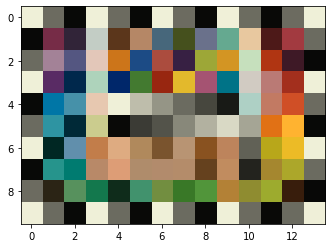

In [15]:
p = get_palette(XYZ, (14, 10), patchsize=1)
p = np.transpose(p, axes=(1,0,2))
for i in range(p.shape[0]):
    for j in range(p.shape[1]):
        p[i, j] = RGB_to_sRGB(np.clip(XYZ_to_RGB(p[i, j]), 0, 1))
plt.imshow(p / np.amax(p))